<a href="https://colab.research.google.com/github/FelipeAvendanoE/Diplomado_Data_Science_UDD/blob/main/4.Capstone_Lepac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inferencia Estadística**

# AE14 - CAPSTONE - Le Pac

## <font color='blue'>**Contexto**</font>

**¿Cómo pasas de ser el pisco más querido al más criticado?**. Esa pregunta se repitió más de una vez en Capel. Los reconocimientos, premios internacionales y números de venta en el extranjero no coincidían con las constantes críticas y malos comentarios que la marca de pisco acumuló durante años.

Fue entonces que desde la pisquera se propusieron darle una vuelta al desprestigio que cargaba sobre sus espaldas y encontrar una solución. Un agencia especializada determinó que lo mejor era hacer un experimento que revelara si los consumidores consideraban realmente que el pisco era malo o si todo era parte de un prejuicio social que se había arraigado con el tiempo.

Decidieron entonces dar un giro en 180°. Crearon una marca con las letras de Capel, pero al revés: **Le Pac**. En "nuevo pisco" tendría una nueva imagen, nuevos colores, un nuevo diseño, una nueva botella y sus propias redes. Nada que pudiera relacionarse con la marca a excepción de una cosa: **el brebaje era exactamente el mismo de siempre**.

Lanzaron el pisco y ofrecieron muestras gratis a cambio de su opinión. En las primeras 24 horas había más de 800 solicitudes en la página web. Entonces las críticas positivas se empezaron a multiplicar. “Tiene buena textura",  "Tiene buen color", "Súper rico",  "Me dejó cero caña”, etc. Esos fueron algunos de los comentarios que recopilaron y que mostraron en el video de la campaña, donde revelan todos los detalles del experimento.

[Le Pac: Un experimento de Pisco Capel.](https://www.youtube.com/watch?v=P4iFsx0l7uY)

A partir de esta experiencia, se le solicita recrear un experimento similar en el que deberá crear un set experimental, aproximar sus datos a algún tipo de distribución, probar intervalos de confianza, realizar test de hipótesis y concluir cómo, con sus resultados, podría apoyar la toma de decisiones en Capel.

__Recomendaciones__


- Aplique la mayor cantidad de conocimientos adquiridos en el presente módulo que estime conveniente.
- Desarrolle las pruebas de hipótesis con la secuencia de pasos entregada.
- Utilice las mayor cantidad de visualizaciones posibles.
- Dado que estamos creando desde cero un escenario de trabajo, realice y especifique todos los supuestos que hagan falta.

## <font color='green'>**Actividad 1**</font>
### Creando los datasets y ajustando sus distribuciones.

Crear 3 datasets con respuestas de clientes a una encuesta de satisfacción de producto. Las encuestas tienen una escala de 1 a 7 (discreta), donde nota 1 es muy baja satisfacción y la nota 7 es muy alta satisfacción con el producto.
Los datasets son los siguientes:

1. **Capel**: crear un conjunto con 800 encuestas de satisfacción, que representan la historia del último trimestre de Capel. La satisfacción en promedio fue de **4.50** puntos y tuvo una distribición similar a la de la siguiente figura para que la use de referencia.

<img src='https://drive.google.com/uc?export=view&id=1lXuvNG6KX4kWeCFnhO2hStObaaAXXB4o' width="400" align="center" style="margin-right: 20px">
<br>


2. **Competencia**: crear un dataset con 500 encuestas de satisfacción, que representan la historia del último trimestre de la principal marca de la competencia. La satisfacción en promedio fue de **6.10** puntos y tuvo una distribición similar a la que se muestra en la siguiente figura, la que puede usar como referencia.

<img src='https://drive.google.com/uc?export=view&id=1WBVhJ4K3p_BGKXvDn3ECGXUcOVdz7eTU' width="400" align="center" style="margin-right: 20px">
<br>

3. **Le Pac**: crear un dataset con 320 encuestas de satisfacción, que representan la satisfacción de clientes de este nuevo producto, estas encuestas fueron realizadas durante 1 mes. La satisfacción en promedio fue de **6.15** puntos y tuvo una distribición similar a la de la siguiente figura para que la use de referencia.

<img src='https://drive.google.com/uc?export=view&id=1WuVRmYEQ9unCcYb076uV9dDEwr1EVmgp' width="400" align="center" style="margin-right: 20px">
<br>


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

<Axes: ylabel='Count'>

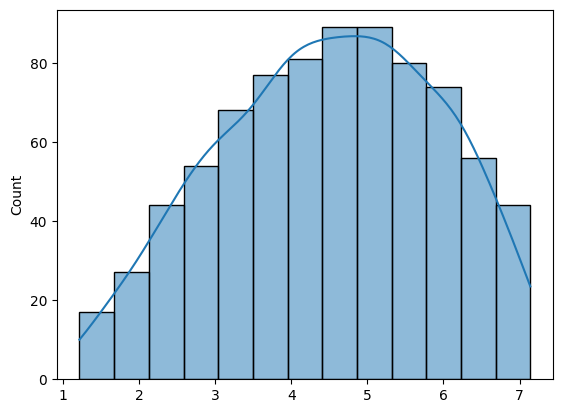

In [2]:
#Buscamos generar un dataset cuyo promedio una vez llevado a numeros enteros sea de 4.5
capel = stats.truncnorm.rvs(loc = 4.75, scale = 2, size=800, a = -1.8, b = 1.2, random_state = 500)
sns.histplot(capel, kde = True)

In [3]:
capel.round().mean()

4.49875

<Axes: ylabel='Count'>

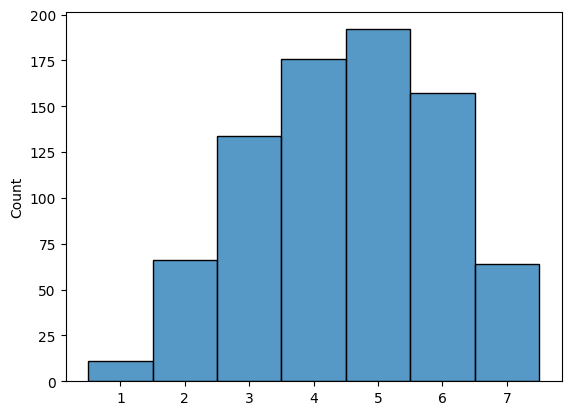

In [4]:
sns.histplot(capel.round(), discrete = True)

<Axes: ylabel='Count'>

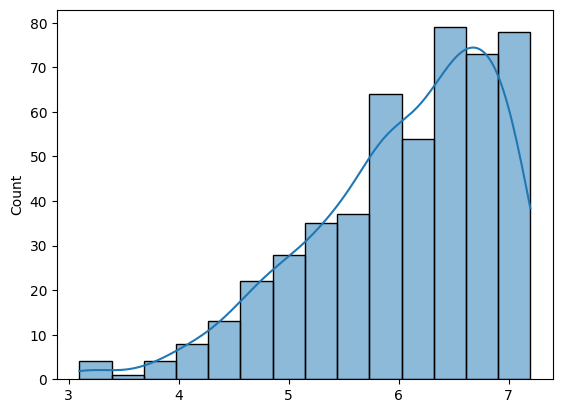

In [5]:
#Buscamos generar un dataset cuyo promedio una vez llevado a numeros enteros sea de 6.1
competencia = stats.truncnorm.rvs(loc = 7.2, scale = 1.5, size=500, a = -3, b = 0, random_state = 500)
sns.histplot(competencia, kde = True)

In [6]:
competencia.round().mean()

6.062

<Axes: ylabel='Count'>

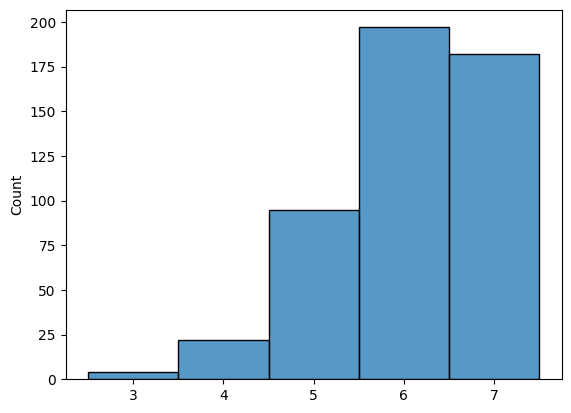

In [7]:
sns.histplot(competencia.round(), discrete = True)

<Axes: ylabel='Count'>

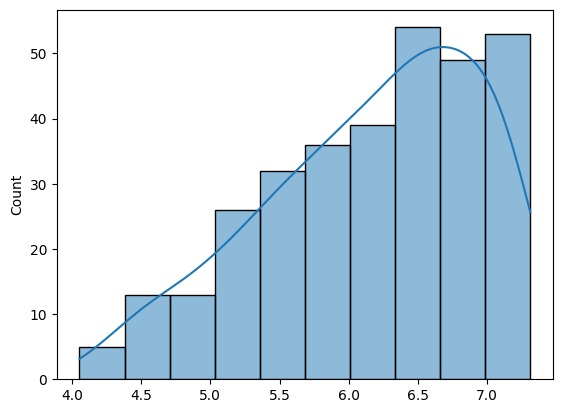

In [8]:
#Buscamos generar un dataset cuyo promedio una vez llevado a numeros enteros sea de 6.15
lepac = stats.truncnorm.rvs(loc = 6.9, scale = 1.4, size=320, a = -2.1, b = 0.3, random_state = 500)
sns.histplot(lepac, kde = True)

In [9]:
lepac.round().mean()

6.159375

<Axes: ylabel='Count'>

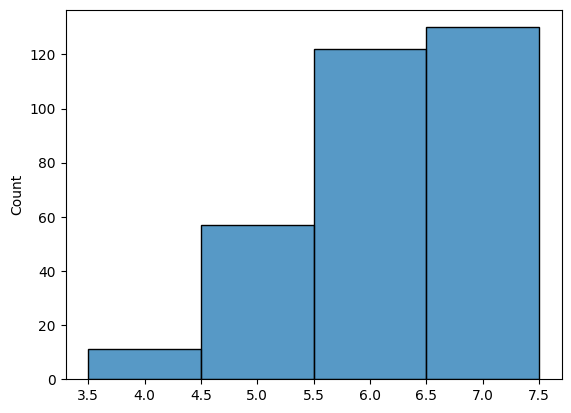

In [10]:
sns.histplot(lepac.round(), discrete = True)

In [11]:
#Llevamos los datasets generados a numeros enteros.
capel = capel.round()
competencia = competencia.round()
lepac = lepac.round()

## <font color='green'>**Actividad 2**</font>
### Estudiando los datasets

Para cada uno de los datasets creados se pide:

1. Graficar el correspondiente histograma y su función de masa de probabilidad y/o distribución de probabilidad según corresponda.

2. Calcular la media y desviación estandar de la muestra.

3. Calcular el porcentaje de notas 6 y 7. Este indicador en Marketing es conocido como el **Top 2 Box Score**, que corresponde a una proproción de las personas que han manifestado satisfacción por el producto/servicio.

4. Calcular el intervalo de confianza para la media y proporción Top2Box. Ambas con un nivel de significancia alpha del 0.05.




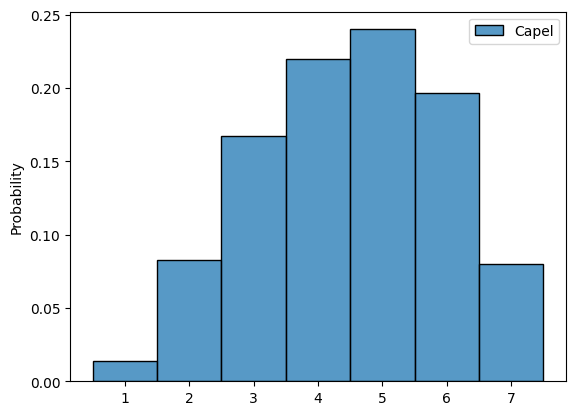

In [12]:
# Tu código aquí ...
#1

sns.histplot(capel, label = 'Capel', stat = 'probability', discrete = True)

plt.legend()



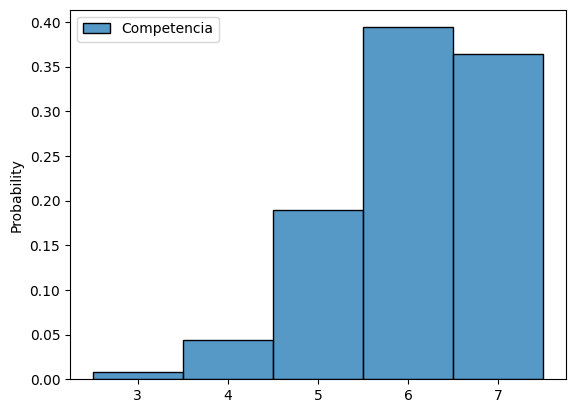

In [13]:
sns.histplot(competencia, label = 'Competencia', stat = 'probability', discrete = True)
plt.legend()


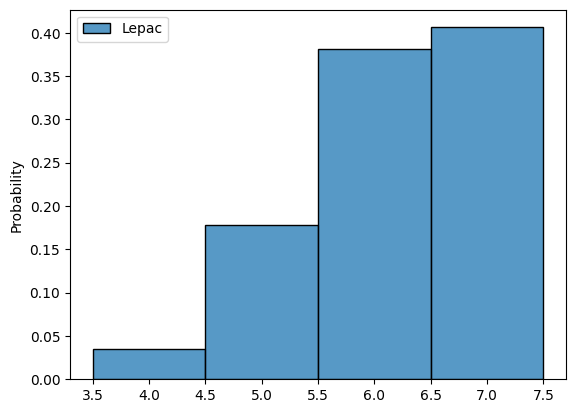

In [14]:
sns.histplot(lepac, label = 'Lepac', stat = 'probability', discrete = True)
plt.legend()


In [15]:
#2 media y desviacion estandar

print(f'La media de Capel es: {capel.mean():.2f}')
print(f'La desviacion estandar de Capel es: {capel.std():.2f}')
print()

print(f'La media de la competencia es: {competencia.mean():.2f}')
print(f'La desviacion estandar de la competencia es: {competencia.std():.2f}')
print()

print(f'La media de Lepac es: {lepac.mean():.2f}')
print(f'La desviacion estandar de lepac es: {lepac.std():.2f}')


La media de Capel es: 4.50
La desviacion estandar de Capel es: 1.46

La media de la competencia es: 6.06
La desviacion estandar de la competencia es: 0.89

La media de Lepac es: 6.16
La desviacion estandar de lepac es: 0.83


In [16]:
print(f'La media de Capel es: {capel.mean():.2f}')
print(f'La desviacion estandar de Capel es: {capel.std():.2f}')

La media de Capel es: 4.50
La desviacion estandar de Capel es: 1.46


In [17]:
#3 Calcular el porcentaje de notas 6 y 7. Este indicador en Marketing es conocido como el Top 2 Box Score, que corresponde a una proproción de las personas que han manifestado satisfacción por el producto/servicio.

df_capel = pd.DataFrame(capel, columns = ['Votos'])
Top_Capel =  (df_capel >= 6).sum() / df_capel.count()
print(f'El Top 2 Box Score de Capel es de {float(Top_Capel[0]):.2%}')

df_competencia = pd.DataFrame(competencia, columns = ['Votos'])
Top_Competencia =  (df_competencia >= 6).sum() / df_competencia.count()
print(f'El Top 2 Box Score de la competencia es de {float(Top_Competencia[0]):.2%}')

df_lepac = pd.DataFrame(lepac, columns = ['Votos'])
Top_lepac =  (df_lepac >= 6).sum() / df_lepac.count()
print(f'El Top 2 Box Score de Lepac es de {float(Top_lepac[0]):.2%}')

El Top 2 Box Score de Capel es de 27.62%
El Top 2 Box Score de la competencia es de 75.80%
El Top 2 Box Score de Lepac es de 78.75%


In [30]:
#4 Calcular el intervalo de confianza para la media y proporción Top2Box. Ambas con un nivel de significancia alpha del 0.05.

IC_capel = stats.norm.interval(confidence = 0.95, loc = df_capel.mean(), scale = (df_capel.std() / df_capel.count()**(1/2) ))

print(f'El intervalo de confianza para la media de Capel es de: {IC_capel[0][0]:.4f} hasta {IC_capel[1][0]:.4f}')

El intervalo de confianza para la media de Capel es de: 4.3979 hasta 4.5996


In [33]:
# Forma alternativa de calcular el IC
IC1 = df_capel.mean() - 1.96 * df_capel.std() / df_capel.count()**(1/2)
IC2 = df_capel.mean() + 1.96 * df_capel.std() / df_capel.count()**(1/2)

print(f'El intervalo de confianza para la media de Capel es de: {IC1[0]:.4f} hasta {IC2[0]:.4f}')

El intervalo de confianza para la media de Capel es de: 4.3978 hasta 4.5997


In [36]:
p = Top_Capel[0]
n = df_capel.count()

IC_capel_top = stats.norm.interval(confidence = 0.95, loc = p , scale = math.sqrt(p * (1-p) / n) )

print(f'El intervalo de confianza para el Top Two Box Score de Capel es de: {IC_capel_top[0]:.4f} hasta {IC_capel_top[1]:.4f}')

El intervalo de confianza para el Top Two Box Score de Capel es de: 0.2453 hasta 0.3072


In [35]:
# Forma alternativa de calcular el IC
p = Top_Capel[0]
n = df_capel.count()
Z = stats.norm.ppf(1-0.05/2)

IC_top1 = Top_Capel[0] - Z * math.sqrt(p * (1-p) / n)
IC_top2 = Top_Capel[0] + Z * math.sqrt(p * (1-p) / n)

print(f'El intervalo de confianza para el Top Two Box Score de Capel es de: {IC_top1:.4f} hasta {IC_top2:.4f}')

El intervalo de confianza para el Top Two Box Score de Capel es de: 0.2453 hasta 0.3072


In [40]:
IC_competencia = stats.norm.interval(confidence = 0.95, loc = df_competencia.mean(), scale = (df_competencia.std() / df_competencia.count()**(1/2) ))

print(f'El intervalo de confianza para la media de la competencia es de: {IC_competencia[0][0]:.4f} hasta {IC_competencia[1][0]:.4f}')
print()

p = Top_Competencia[0]
n = df_competencia.count()

IC_competencia_top = stats.norm.interval(confidence = 0.95, loc = p , scale = math.sqrt(p * (1-p) / n) )

print(f'El intervalo de confianza para el Top Two Box Score de la competencia es de: {IC_competencia_top[0]:.4f} hasta {IC_competencia_top[1]:.4f}')

El intervalo de confianza para la media de la competencia es de: 5.9836 hasta 6.1404

El intervalo de confianza para el Top Two Box Score de la competencia es de: 0.7205 hasta 0.7955


In [41]:
IC_Lepac = stats.norm.interval(confidence = 0.95, loc = df_lepac.mean(), scale = (df_lepac.std() / df_lepac.count()**(1/2) ))

print(f'El intervalo de confianza para la media de Lepac es de: {IC_Lepac[0][0]:.4f} hasta {IC_Lepac[1][0]:.4f}')
print()

p = Top_lepac[0]
n = df_lepac.count()

IC_lepac_top = stats.norm.interval(confidence = 0.95, loc = p , scale = math.sqrt(p * (1-p) / n) )

print(f'El intervalo de confianza para el Top Two Box Score de Lepac es de: {IC_lepac_top[0]:.4f} hasta {IC_lepac_top[1]:.4f}')
print()

El intervalo de confianza para la media de Lepac es de: 6.0678 hasta 6.2510

El intervalo de confianza para el Top Two Box Score de Lepac es de: 0.7427 hasta 0.8323



## <font color='green'>**Actividad 3**</font>
### Creando nuestro test de hipótesis

Desarrollar un test de hipótesis de 1 muestra para al menos 1 de los 3 datasets. Aquí Ud. puede formular la hipótesis a probar. Por ejemplo, puede ser contra un target definido por la industria o retail.




$$H_0:\mu = 6 $$
$$H_1:\mu > 6 $$
<br>

In [ ]:
# Tu código aquí ...

stats.ttest_1samp(a = df_lepac, popmean = 6, alternative = 'greater')

TtestResult(statistic=array([3.41085215]), pvalue=array([0.00036546]), df=array([319]))

Dado que nuestro valor P es menor que 5% podemos rechazar la hipotesis nula.

## <font color='green'>**Actividad 4**</font>
### Validación de algunos test de hipótesis

Desarrollar los siguientes test de hipótesis de 2 muestras para:

1. Verificar si la satisfacción de Le Pac es mayor a la del producto Capel.

2. Verificar si la satisfacción de Le Pac es mayor a la Competencia.


$$H_0:\mu Lepac = \mu Capel $$
$$H_1:\mu Lepac > \mu Capel $$

In [ ]:
# 1
stats.ttest_ind(a = df_lepac, b = df_capel, alternative = 'greater')

TtestResult(statistic=array([19.17374926]), pvalue=array([2.28635368e-71]), df=array([1118.]))

Debido a que tenemos un valor P muy pequeño, se rechaza H0



$$H_0:\mu Lepac = \mu Competencia $$
$$H_1:\mu Lepac > \mu Competencia $$

In [43]:
# 2
stats.ttest_ind(a = df_lepac, b = df_competencia, alternative = 'greater')

TtestResult(statistic=array([1.55990983]), pvalue=array([0.05958399]), df=array([818.]))

Debido a que P es mayor al 5% no podemos rechazar H0